In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [ ]:
#storing the stock price data into a dataframe
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-05,197.990005,198.649994,192.580002,193.339996,191.059784,52393000
1,2019-08-06,196.309998,198.070007,194.039993,197.000000,194.676620,35824800
2,2019-08-07,195.410004,199.559998,193.820007,199.039993,196.692566,33364400
3,2019-08-08,200.199997,203.529999,199.389999,203.429993,201.030792,27009500
4,2019-08-09,201.300003,202.759995,199.289993,200.990005,199.374222,24619700


In [ ]:
#Get the number of trading days
df.shape

(253, 7)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

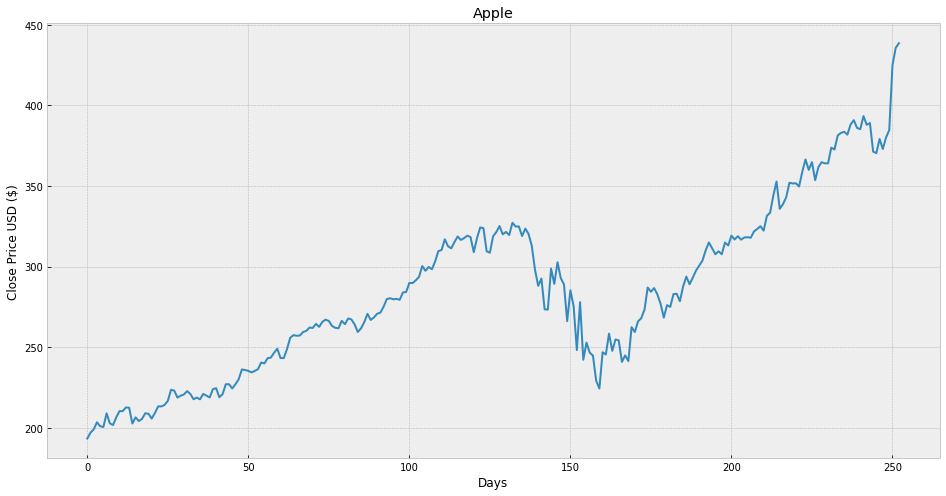

In [ ]:
#Visualize the close price data
plt.figure(figsize = (16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
# Get the close price 
df = df[['Close']]
df.head(4)

,Close
0,193.339996
1,197.000000
2,199.039993
3,203.429993


In [ ]:
#Create a variable to predict 'x' days out into the future
future_days = 25 
#Create a new column(target) shifted 'x' units/days up 
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,193.339996,216.699997
1,197.000000,223.589996
2,199.039993,223.089996
3,203.429993,218.750000


In [ ]:
# create the feature data set (X) and convert it to a numpy array and remove the last 'X' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[193.339996]
 [197.      ]
 [199.039993]
 [203.429993]
 [200.990005]
 [200.479996]
 [208.970001]
 [202.75    ]
 [201.740005]
 [206.5     ]
 [210.350006]
 [210.360001]
 [212.639999]
 [212.460007]
 [202.639999]
 [206.490005]
 [204.160004]
 [205.529999]
 [209.009995]
 [208.740005]
 [205.699997]
 [209.190002]
 [213.279999]
 [213.259995]
 [214.169998]
 [216.699997]
 [223.589996]
 [223.089996]
 [218.75    ]
 [219.899994]
 [220.699997]
 [222.770004]
 [220.960007]
 [217.729996]
 [218.720001]
 [217.679993]
 [221.029999]
 [219.889999]
 [218.820007]
 [223.970001]
 [224.589996]
 [218.960007]
 [220.820007]
 [227.009995]
 [227.059998]
 [224.399994]
 [227.029999]
 [230.089996]
 [236.210007]
 [235.869995]
 [235.320007]
 [234.369995]
 [235.279999]
 [236.410004]
 [240.509995]
 [239.960007]
 [243.179993]
 [243.580002]
 [246.580002]
 [249.050003]
 [243.289993]
 [243.259995]
 [248.759995]
 [255.820007]
 [257.5     ]
 [257.130005]
 [257.23999 ]
 [259.429993]
 [260.140015]
 [262.200012]
 [261.959991]
 [264.

In [ ]:
#create the target data set(y) and convert it to a numpy array and get all of the target values except the last 'x' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[216.699997 223.589996 223.089996 218.75     219.899994 220.699997
 222.770004 220.960007 217.729996 218.720001 217.679993 221.029999
 219.889999 218.820007 223.970001 224.589996 218.960007 220.820007
 227.009995 227.059998 224.399994 227.029999 230.089996 236.210007
 235.869995 235.320007 234.369995 235.279999 236.410004 240.509995
 239.960007 243.179993 243.580002 246.580002 249.050003 243.289993
 243.259995 248.759995 255.820007 257.5      257.130005 257.23999
 259.429993 260.140015 262.200012 261.959991 264.470001 262.640015
 265.76001  267.100006 266.290009 263.190002 262.01001  261.779999
 266.369995 264.290009 267.839996 267.25     264.160004 259.450012
 261.73999  265.579987 270.709991 266.920013 268.480011 270.769989
 271.459991 275.149994 279.859985 280.410004 279.73999  280.019989
 279.440002 284.       284.269989 289.910004 289.799988 291.519989
 293.649994 300.350006 297.429993 299.799988 298.390015 303.190002
 309.630005 310.329987 316.959991 312.679993 311.339996 315.239

In [ ]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [ ]:
#Create the models 
#Create the decision tree regressor model 
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model 
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#get the last 'x rows of the feature data set
x_future = df.drop(["Prediction"], 1)[-future_days:]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future 

array([[364.799988],
       [364.109985],
       [364.109985],
       [373.850006],
       [372.690002],
       [381.369995],
       [383.01001 ],
       [383.679993],
       [381.910004],
       [388.230011],
       [390.899994],
       [386.089996],
       [385.309998],
       [393.429993],
       [388.      ],
       [389.089996],
       [371.380005],
       [370.459991],
       [379.23999 ],
       [373.01001 ],
       [380.160004],
       [384.76001 ],
       [425.040009],
       [435.75    ],
       [438.660004]])

In [ ]:
#Show the model tree prediction 
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[425.040009 425.040009 425.040009 380.160004 380.160004 380.160004
 380.160004 380.160004 380.160004 380.160004 380.160004 380.160004
 380.160004 380.160004 380.160004 380.160004 380.160004 380.160004
 380.160004 380.160004 380.160004 380.160004 380.160004 380.160004
 380.160004]

[365.3698246  364.8036194  364.8036194  372.79612161 371.84424126
 378.9669018  380.31267133 380.86244844 379.41002437 384.59611893
 386.78706338 382.84005756 382.20000393 388.86313926 384.40737566
 385.30180858 370.76927912 370.01433065 377.21905448 372.1068346
 377.97400294 381.74869276 414.80180229 423.59024604 425.97814781]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


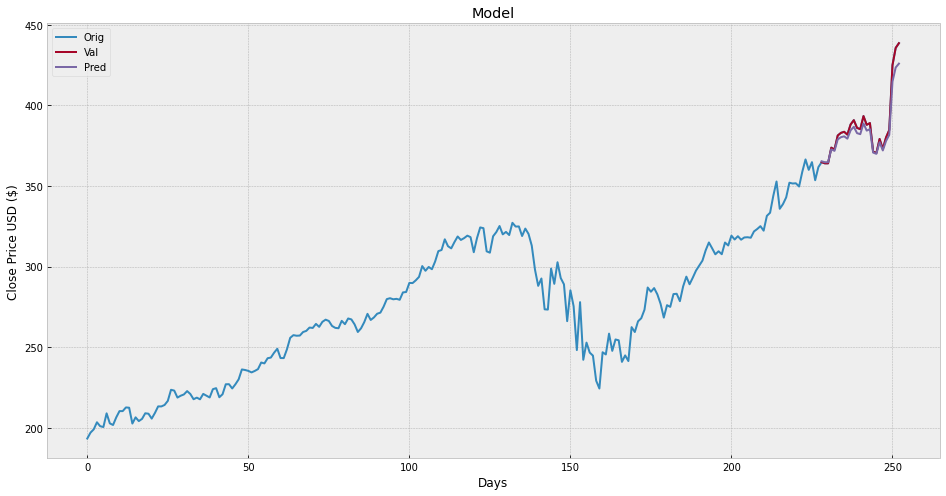

In [ ]:
#visualize the data 
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()